<a href="https://colab.research.google.com/github/minhduc01168/ET_Tri_tue_nhan_tao/blob/master/Hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Hyperparameter tuning**

In [ ]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve, accuracy_score
from imblearn import under_sampling, over_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/AI_ML_DS/AI/BTL_AI/credit_risk_dataset_normalization.csv')

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.038462,0.026807,0.666667,0.3125,0.2,0.25,0.018450,0.400841,0.0,0.191489,0.0,0.000000
1,0.038462,0.028263,0.666667,0.1250,1.0,0.00,0.073801,0.120533,1.0,0.510638,0.0,0.000000
2,0.038462,0.028749,0.666667,0.3750,1.0,0.75,0.040590,0.653118,1.0,0.319149,0.0,0.071429
3,0.038462,0.028749,0.666667,0.1250,0.4,0.00,0.147601,0.224947,1.0,0.936170,0.0,0.000000
4,0.153846,0.032634,0.000000,0.5000,0.2,0.25,0.046125,0.390329,1.0,0.319149,0.0,0.000000


In [ ]:
X = pd.DataFrame(df)
X = X.drop(['loan_status'], axis=1)
y = df[['loan_status']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  29998 non-null  float64
 1   person_income               29998 non-null  float64
 2   person_home_ownership       29998 non-null  float64
 3   person_emp_length           29998 non-null  float64
 4   loan_intent                 29998 non-null  float64
 5   loan_grade                  29998 non-null  float64
 6   loan_amnt                   29998 non-null  float64
 7   loan_int_rate               29998 non-null  float64
 8   loan_percent_income         29998 non-null  float64
 9   cb_person_default_on_file   29998 non-null  float64
 10  cb_person_cred_hist_length  29998 non-null  float64
dtypes: float64(11)
memory usage: 2.5 MB


In [ ]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.038462,0.026807,0.666667,0.3125,0.2,0.25,0.018450,0.400841,0.191489,0.0,0.000000
1,0.038462,0.028263,0.666667,0.1250,1.0,0.00,0.073801,0.120533,0.510638,0.0,0.000000
2,0.038462,0.028749,0.666667,0.3750,1.0,0.75,0.040590,0.653118,0.319149,0.0,0.071429
3,0.038462,0.028749,0.666667,0.1250,0.4,0.00,0.147601,0.224947,0.936170,0.0,0.000000
4,0.153846,0.032634,0.000000,0.5000,0.2,0.25,0.046125,0.390329,0.319149,0.0,0.000000


In [ ]:
y.head()

,loan_status
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
y = y.values.ravel()

In [ ]:
# Train, Test, Split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=152, stratify=y)

### **KNN**

In [ ]:
"""2) Hypertuning"""

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"n_neighbors": range(1,15), "metric": ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

# Define Hypertuning model
knn_cv = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=param_dist, cv=5, return_train_score=False)

# Fit
knn_cv.fit(X_train,Y_train)

# Best parameters
print('Best parameters for KNN Classifier are:', knn_cv.best_params_)

Best parameters for KNN Classifier are: {'n_neighbors': 12, 'metric': 'manhattan'}


Accuracy score of KNN model 2 is: 0.8935
[[4676   83]
 [ 556  685]]
Classification Report of KNN 2nd Model
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94      4759
         1.0       0.89      0.55      0.68      1241

    accuracy                           0.89      6000
   macro avg       0.89      0.77      0.81      6000
weighted avg       0.89      0.89      0.88      6000



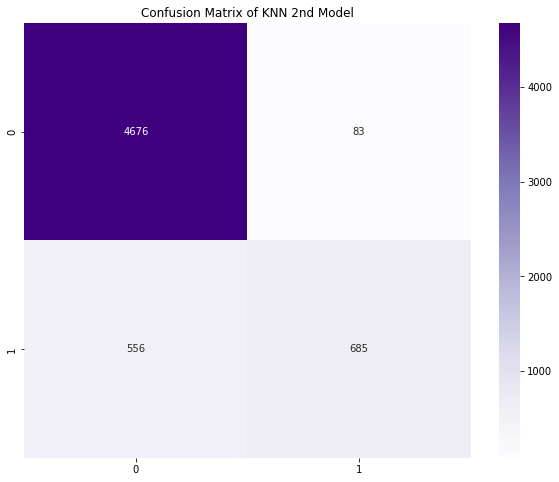

In [ ]:
# Define the model
clf_10 = KNeighborsClassifier(n_neighbors=13, metric='manhattan')

# Fit the model
clf_10.fit(X_train,Y_train)

# Make prediction
pred_10 = clf_10.predict(X_test)

# Accuracy score
print('Accuracy score of KNN model 2 is:', accuracy_score(Y_test, pred_10))

# Confusion Matrix
conmat_10 = confusion_matrix(Y_test, pred_10)
print(conmat_10)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of KNN 2nd Model')
sns.heatmap(conmat_10, annot=True, cmap="Purples", fmt="d",cbar=True)

# Classification Report
print('Classification Report of KNN 2nd Model')
print(classification_report(Y_test, pred_10))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# KNN classifier
knn = KNeighborsClassifier()

# Use k-fold cross validation with k=10
scores = cross_val_score(knn, X, y, cv=10)

# Print the mean and standard deviation of the scores
print("Array acucuracy KNN ")
print(scores)
print("Accuracy: %0.2f" % scores.mean())

Array acucuracy KNN 
[0.88466667 0.85966667 0.87333333 0.88833333 0.88966667 0.86466667
 0.84166667 0.86166667 0.88096032 0.87662554]
Accuracy: 0.87


## **Decision Tree Classifier**

In [ ]:
"""2) Hypertuning """

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": range(1,5), "min_samples_split": range(2,10), "min_samples_leaf": range(1,5), "criterion": ["gini", "entropy"]}

# Define Hypertuning model
tree_cv = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=param_dist, cv=10, return_train_score=False)

# Fit
tree_cv.fit(X_train,Y_train)

# Best parameters
print('Best parameters for Decision Tree Classification are:', tree_cv.best_params_)

Best parameters for Decision Tree Classification are: {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 3, 'criterion': 'gini'}


Accuracy score of Decision Tree model 2 is: 0.9096666666666666
[[4754    5]
 [ 537  704]]
Classification Report of Decision Tree 2nd Model
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      4759
         1.0       0.99      0.57      0.72      1241

    accuracy                           0.91      6000
   macro avg       0.95      0.78      0.83      6000
weighted avg       0.92      0.91      0.90      6000



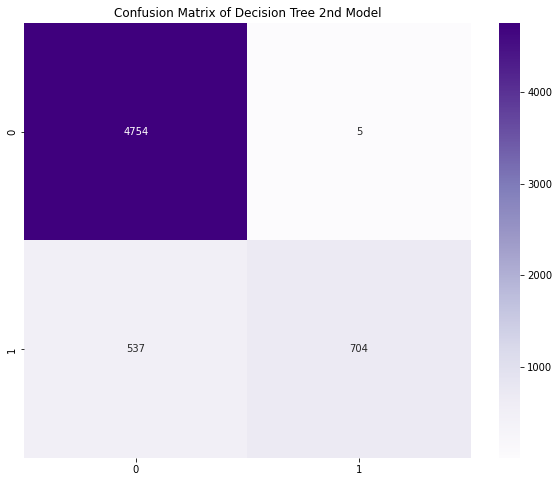

In [ ]:
# Define the model
clf_2 = DecisionTreeClassifier(min_samples_split=6, min_samples_leaf=4, max_depth=4, criterion='entropy')
# Fit the model
clf_2.fit(X_train,Y_train)

# Make prediction
pred_2 = clf_2.predict(X_test)

# Accuracy score
print('Accuracy score of Decision Tree model 2 is:', accuracy_score(Y_test, pred_2))

# Confusion Matrix
conmat_2 = confusion_matrix(Y_test, pred_2)
print(conmat_2)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of Decision Tree 2nd Model')
sns.heatmap(conmat_2, annot=True, cmap="Purples", fmt="d",cbar=True)

# Classification Report
print('Classification Report of Decision Tree 2nd Model')
print(classification_report(Y_test, pred_2))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Decision Tree classifier
dt = DecisionTreeClassifier()

# Use k-fold cross validation with k=10
scores = cross_val_score(dt, X, y, cv=10)

# Print the mean and standard deviation of the scores
print("Array acucuracy Decision Tree Classifier ")
print(scores)
print("Accuracy: %0.2f" % scores.mean())

Array acucuracy Decision Tree Classifier 
[0.821      0.77666667 0.793      0.82033333 0.88333333 0.89666667
 0.82833333 0.83533333 0.90263421 0.86162054]
Accuracy: 0.84


## **Random Forest Classifier**

In [ ]:
"""2) Hypertuning"""

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"n_estimators": [50, 150, 200, 250], "max_depth": range(1,5), "min_samples_split": range(2, 10), "min_samples_leaf": range(1,5), "criterion": ["gini", "entropy"]}

# Define Hypertuning model
rf_cv = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist, cv=5, return_train_score=False)

# Fit
rf_cv.fit(X_train,Y_train)

# Best parameters
print('Best parameters for Random Forest Classifier are:', rf_cv.best_params_)

Best parameters for Random Forest Classifier are: {'n_estimators': 250, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 4, 'criterion': 'gini'}


Accuracy score of Random Forest model 2 is: 0.9
[[4741   18]
 [ 582  659]]
Classification Report of Random Forest 2nd Model
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      4759
         1.0       0.97      0.53      0.69      1241

    accuracy                           0.90      6000
   macro avg       0.93      0.76      0.81      6000
weighted avg       0.91      0.90      0.89      6000



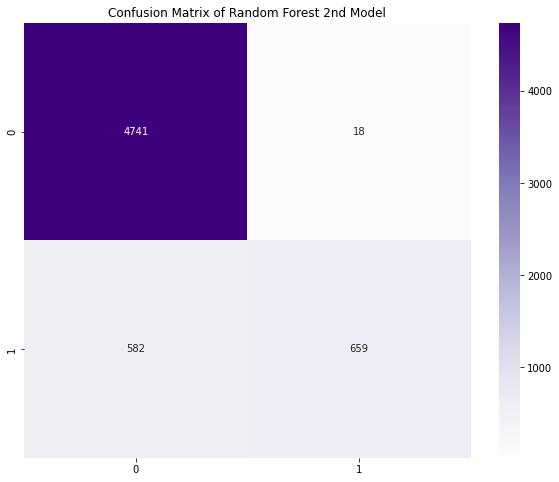

In [ ]:
# Define the model
clf_6 = RandomForestClassifier(n_estimators=50, min_samples_split=6, min_samples_leaf=2,max_depth=4, criterion='gini')

# Fit the model
clf_6.fit(X_train,Y_train)

# Make prediction
pred_6 = clf_6.predict(X_test)

# Accuracy score
print('Accuracy score of Random Forest model 2 is:', accuracy_score(Y_test, pred_6))

# Confusion Matrix
conmat_6 = confusion_matrix(Y_test, pred_6)
print(conmat_6)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of Random Forest 2nd Model')
sns.heatmap(conmat_6, annot=True, cmap="Purples", fmt="d",cbar=True)

# Classification Report
print('Classification Report of Random Forest 2nd Model')
print(classification_report(Y_test, pred_6))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Random Forest Classifier
rf = RandomForestClassifier()

# Use k-fold cross validation with k=10
scores = cross_val_score(rf, X, y, cv=10)

# Print the mean and standard deviation of the scores
print("Array acucuracy Random Forest Classifier ")
print(scores)
print("Accuracy: %0.2f" % scores.mean())

Array acucuracy Random Forest Classifier 
[0.915      0.91066667 0.89033333 0.91666667 0.924      0.93133333
 0.931      0.901      0.92697566 0.93797933]
Accuracy: 0.92


### **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# Define the parameter grid
param_grid = {'C': uniform(0, 10),
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto'] + list(np.arange(0.1, 2, 0.1)),
              'degree': range(1,5),
              'decision_function_shape': ['ovr','ovo']}
              
# Initialize the SVM classifier
svm = SVC()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(svm, param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)


Best parameters:  {'C': 8.230747976521972, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 1.9000000000000001, 'kernel': 'rbf'}
Best score:  0.902450224005001


Accuracy score of Random Forest model 2 is: 0.9053333333333333
[[4664   95]
 [ 473  768]]
Classification Report of Random Forest 2nd Model
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      4759
         1.0       0.89      0.62      0.73      1241

    accuracy                           0.91      6000
   macro avg       0.90      0.80      0.84      6000
weighted avg       0.90      0.91      0.90      6000



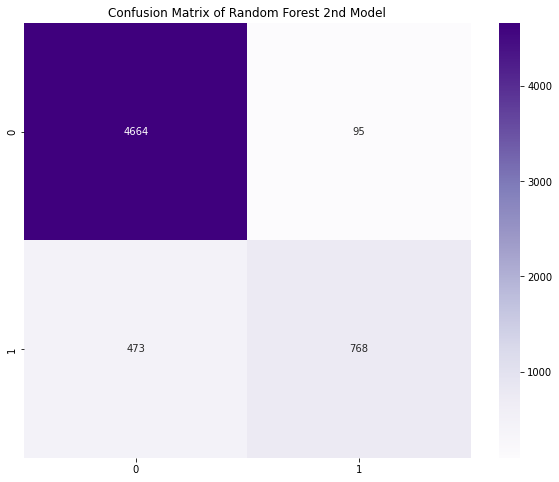

In [ ]:
from sklearn.svm import SVC
# Define the model
clf_6 = SVC(C= 9.451947417013804, decision_function_shape= 'ovr', degree= 4, gamma= 1.6, kernel= 'rbf')

# Fit the model
clf_6.fit(X_train,Y_train)

# Make prediction
pred_6 = clf_6.predict(X_test)

# Accuracy score
print('Accuracy score of Random Forest model 2 is:', accuracy_score(Y_test, pred_6))

# Confusion Matrix
conmat_6 = confusion_matrix(Y_test, pred_6)
print(conmat_6)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of Random Forest 2nd Model')
sns.heatmap(conmat_6, annot=True, cmap="Purples", fmt="d",cbar=True)

# Classification Report
print('Classification Report of Random Forest 2nd Model')
print(classification_report(Y_test, pred_6))

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# SVM classifier
svm = SVC()

# Use k-fold cross validation with k=10
scores = cross_val_score(svm, X, y, cv=10)

# Print the mean and standard deviation of the scores
print("Array acucuracy SVM")
print(scores)
print("Accuracy: %0.2f" % scores.mean())

Array acucuracy SVM
[0.91566667 0.87466667 0.87066667 0.89033333 0.89466667 0.87166667
 0.88033333 0.88133333 0.87729243 0.88729577]
Accuracy: 0.88


### **Naive Bayes**



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter grid
param_grid = {'alpha': uniform(0, 2),
              'fit_prior': [True, False],
              'class_prior': [None, [0.5, 0.5]]}
              
# Initialize the Naive Bayes classifier
nb = MultinomialNB()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(nb, param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)


Best parameters:  {'alpha': 0.24526464827562378, 'class_prior': None, 'fit_prior': True}
Best score:  0.7931494408557338


Accuracy score of Random Forest model 2 is: 0.7931666666666667
[[4601  158]
 [1083  158]]
Classification Report of Random Forest 2nd Model
              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      4759
         1.0       0.50      0.13      0.20      1241

    accuracy                           0.79      6000
   macro avg       0.65      0.55      0.54      6000
weighted avg       0.75      0.79      0.74      6000



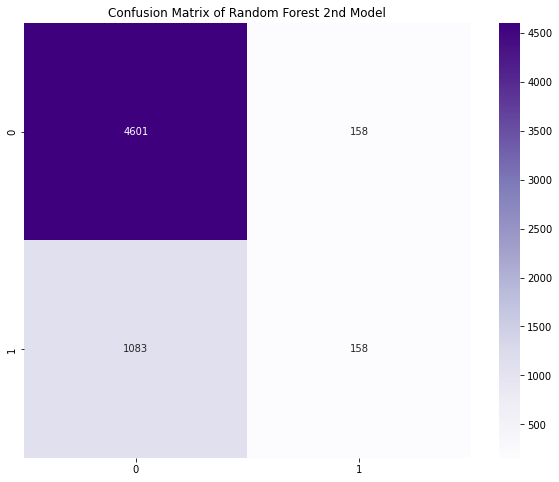

In [ ]:
from sklearn.naive_bayes import BernoulliNB
# Define the model
clf_6 = BernoulliNB(alpha= 0.27622103309475254, class_prior= None, fit_prior= True)

# Fit the model
clf_6.fit(X_train,Y_train)

# Make prediction
pred_6 = clf_6.predict(X_test)

# Accuracy score
print('Accuracy score of Random Forest model 2 is:', accuracy_score(Y_test, pred_6))

# Confusion Matrix
conmat_6 = confusion_matrix(Y_test, pred_6)
print(conmat_6)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of Random Forest 2nd Model')
sns.heatmap(conmat_6, annot=True, cmap="Purples", fmt="d",cbar=True)

# Classification Report
print('Classification Report of Random Forest 2nd Model')
print(classification_report(Y_test, pred_6))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Naive Bayes classifier
nb = GaussianNB()

# Use k-fold cross validation with k=10
scores = cross_val_score(nb, X, y, cv=10)

# Print the mean and standard deviation of the scores
print("Array acucuracy Naive Bayes ")
print(scores)
print("Accuracy: %0.2f" % scores.mean())

Array acucuracy Naive Bayes 
[0.79333333 0.79166667 0.79533333 0.79633333 0.836      0.799
 0.78366667 0.80566667 0.84061354 0.8306102 ]
Accuracy: 0.81
